# 多项式基本函数
将线性回归应用在变量之间的非线性关系的一个技巧是，将数据通过*基本函数*进行转换
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
令$x_n = f_n(x_1x_2,\cdots, x_n)$， **函数列的线性组合**，线性的意思是指模型中的斜率$a_n$没有互相进行乘法或除法操作。


多项式投射如此有用，所以Scikit-Learn內建了实现它的方法，就是`PolynomialFeatures`转换：

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [7]:
from sklearn.preprocessing import  PolynomialFeatures
x=np.array([2,3,4])
poly = PolynomialFeatures(4,include_bias=True)
poly.fit_transform(x[:,None])

array([[  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

使用这个转换器我们对每个值求幂将一维数组变成了五维数组，这个新的高维数据表示能应用到线性回归中，实现这个任务最优雅的方法是使用管道。

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

有了这样的转换方式，我们可以使用线性模型来拟合复杂得多的$x$和$y$的关系。例如像下面的带有噪音的正弦波：

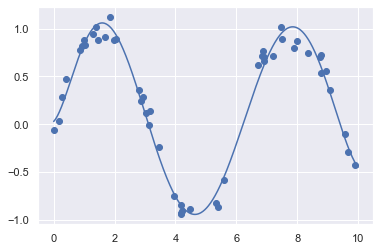

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,None], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);